# Using Matplotlib

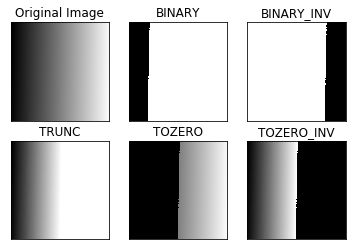

In [1]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(r'Desktop\opencv-master\opencv-master\samples\data\gradient.png',0)
_, th1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)
_, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
_, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, th1 ,th2 ,th3 ,th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Morphological Transformations

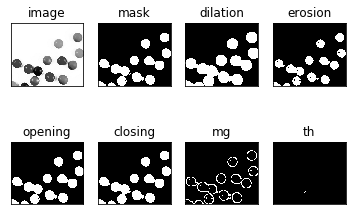

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'Desktop\opencv-master\opencv-master\samples\data\smarties.png', 0)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Smoothing Images/Blurring Images

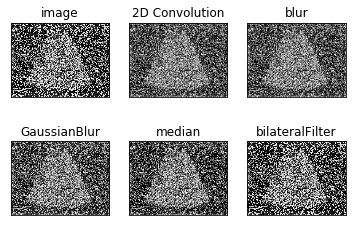

In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\guru sai reddy\Desktop\salt&pepper.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (5, 5))
gblur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

for i in range(6):
    plt.subplot(2, 3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Image Gradients and Edge Detection

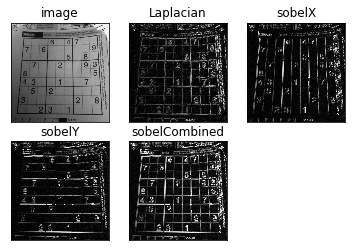

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"Desktop\opencv-master\opencv-master\samples\data\sudoku.png", 0)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


# Canny Edge Detection

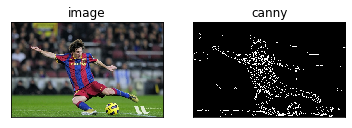

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\messi5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100, 200)

titles = ['image', 'canny']
images = [img, canny]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Canny Edge Detection

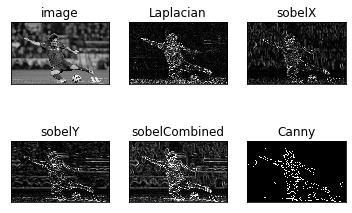

<Figure size 7200x7200 with 0 Axes>

In [30]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\messi5.jpg",0)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.figure(figsize=(100,100)) 
plt.show()

#  Image Pyramids

In [31]:
import cv2
import numpy as np
img = cv2.imread(r"C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\lena.jpg")
layer = img.copy()
gaussian_pyramid_list = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_list.append(layer)
    #cv2.imshow(str(i), layer)

layer = gaussian_pyramid_list[5]
cv2.imshow('upper level Gaussian Pyramid', layer)
laplacian_pyramid_list = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gaussian_pyramid_list[i])
    laplacian = cv2.subtract(gaussian_pyramid_list[i-1], gaussian_extended)
    cv2.imshow(str(i), laplacian)

cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Blending

In [33]:
import cv2
import numpy as np
apple = cv2.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\apple.jpg')
orange = cv2.imread(r'C:\Users\guru sai reddy\Desktop\opencv-master\opencv-master\samples\data\orange.jpg')
print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:, 256:]))

# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)


# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

cv2.imshow("apple", apple)
cv2.imshow("orange", orange)
cv2.imshow("apple_orange", apple_orange)
cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)
(512, 512, 3)
